## 1. Importing

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Importing dataset

In [2]:
data = pd.read_csv('output_data.csv', encoding='latin1')
data

,RESPONSE,Gender,Age group,Educational attainment,Annual income,M_SPENDING,Y_TELCOM,Y_CURRENT,MINS_CALL,H_SCREEN,M_DATA,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,REASON,CHURN
0,R001,Female,26-35,Master's degree,"£40,000-£60,000",5$,7,5,65,9.5,30,2.0,5.0,7.0,4.0,1.0,8.0,no,8.0
1,R002,Male,26-35,Master's degree,"£40,000-£60,000",1$,7 years,5 years,11,10.0,10,5.0,3.0,3.0,2.0,2.0,6.0,No,5.0
2,R003,Male,36-50,Master's degree,"£40,000-£60,000",30,5,2 years,16,1.5,40,NaN,NaN,7.0,9.0,1.0,8.0,My family,NaN
3,R004,Male,26-35,Doctoral degree,"£40,000-£60,000",15£,15,9,6,5.5,45,5.0,9.0,4.0,6.0,1.0,6.0,NaN,9.0
4,R005,Female,36-50,Bachelor's degree,"£60,000-£80,000",500,20,3,6,7.0,15,4.0,7.0,5.0,5.0,1.0,6.0,Ndbd,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,R171,Female,26-35,High school diploma,"£40,000-£60,000",13GBP,10,4,1,15.0,35,7.0,5.0,8.0,7.0,2.0,9.0,Stable transmission,9.0
171,R172,Male,18-25,Bachelor's degree,"£20,000-£40,000",7 GBP,7 years,3 years,11,19.0,40,8.0,7.0,9.0,9.0,1.0,7.0,NaN,9.0
172,R173,Female,18-25,Bachelor's degree,"£40,000-£60,000",7 GBP,5,3,11,1.5,35,8.0,7.0,9.0,9.0,1.0,8.0,NaN,8.0
173,R174,Female,18-25,Bachelor's degree,"£40,000-£60,000",7,7,6,6,10.5,40,7.0,5.0,7.0,7.0,2.0,6.0,transmission problem,7.0


## 2. Exploratory Data Analysis (EDA)

In [3]:
data.columns

Index(['RESPONSE', 'Gender', 'Age group', 'Educational attainment',
       'Annual income', 'M_SPENDING', 'Y_TELCOM', 'Y_CURRENT', 'MINS_CALL',
       'H_SCREEN', 'M_DATA', 'SATISFACTION', 'RECOMMEND', 'QUALITY', 'NETWORK',
       'PAYMENT', 'PRICE', 'REASON', 'CHURN'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESPONSE                175 non-null    object 
 1   Gender                  175 non-null    object 
 2   Age group               175 non-null    object 
 3   Educational attainment  175 non-null    object 
 4   Annual income           175 non-null    object 
 5   M_SPENDING              154 non-null    object 
 6   Y_TELCOM                160 non-null    object 
 7   Y_CURRENT               159 non-null    object 
 8   MINS_CALL               175 non-null    int64  
 9   H_SCREEN                175 non-null    float64
 10  M_DATA                  175 non-null    int64  
 11  SATISFACTION            161 non-null    float64
 12  RECOMMEND               162 non-null    float64
 13  QUALITY                 163 non-null    float64
 14  NETWORK                 163 non-null    fl

In [5]:
data.describe()

,MINS_CALL,H_SCREEN,M_DATA,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,CHURN
count,175.000000,175.000000,175.000000,161.000000,162.000000,163.000000,163.000000,165.000000,164.000000,163.000000
mean,15.942857,11.148571,27.560000,6.962733,7.037037,7.177914,7.147239,1.284848,7.213415,7.085890
std,26.166293,5.764356,12.426131,1.990252,1.974650,1.811896,1.869948,0.452716,1.611939,1.912915
min,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.500000,15.000000,6.000000,6.000000,7.000000,6.000000,1.000000,6.000000,6.000000
50%,11.000000,11.000000,30.000000,8.000000,7.000000,8.000000,8.000000,1.000000,7.000000,8.000000
75%,16.000000,16.500000,35.000000,8.000000,8.000000,8.000000,8.000000,2.000000,8.000000,8.000000
max,177.000000,20.500000,45.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000


## 3. Data Preprocessing

### 3.1. Original dataset preprocessing

#### M_SPENDING > M_SPENDING_NUM > M_SPENDING_GBP

In [6]:
data['M_SPENDING_NUM'] = data['M_SPENDING'].str.extract('(\d+\.\d+|\d+)').astype(float)

def convert_currency(row):
    currency_str = str(row['M_SPENDING']).lower()

    if '$' in currency_str:
        return round(row['M_SPENDING_NUM'] * 0.79, 1)
    elif 'vnd' in currency_str or row['M_SPENDING_NUM'] > 1000:
        return round(row['M_SPENDING_NUM'] * 0.000032, 1)
    elif 'eur' in currency_str:
        return round(row['M_SPENDING_NUM'] * 0.86, 1)
    else:
        return round(row['M_SPENDING_NUM'], 1)

data['M_SPENDING_GBP'] = data.apply(convert_currency, axis=1)

# Display the updated DataFrame
data.head()


,RESPONSE,Gender,Age group,Educational attainment,Annual income,M_SPENDING,Y_TELCOM,Y_CURRENT,MINS_CALL,H_SCREEN,...,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,REASON,CHURN,M_SPENDING_NUM,M_SPENDING_GBP
0,R001,Female,26-35,Master's degree,"£40,000-£60,000",5$,7,5,65,9.5,...,2.0,5.0,7.0,4.0,1.0,8.0,no,8.0,5.0,4.0
1,R002,Male,26-35,Master's degree,"£40,000-£60,000",1$,7 years,5 years,11,10.0,...,5.0,3.0,3.0,2.0,2.0,6.0,No,5.0,1.0,0.8
2,R003,Male,36-50,Master's degree,"£40,000-£60,000",30,5,2 years,16,1.5,...,NaN,NaN,7.0,9.0,1.0,8.0,My family,NaN,30.0,30.0
3,R004,Male,26-35,Doctoral degree,"£40,000-£60,000",15£,15,9,6,5.5,...,5.0,9.0,4.0,6.0,1.0,6.0,NaN,9.0,15.0,15.0
4,R005,Female,36-50,Bachelor's degree,"£60,000-£80,000",500,20,3,6,7.0,...,4.0,7.0,5.0,5.0,1.0,6.0,Ndbd,5.0,500.0,500.0


#### Y_TELCOM > Y_TELCOM_NUM and Y_CURRENT > Y_CURRENT_NUM

In [7]:
data['Y_TELCOM_NUM'] = data['Y_TELCOM'].str.extract('(\d+\.\d+|\d+)').astype(float)
data['Y_CURRENT_NUM'] = data['Y_CURRENT'].str.extract('(\d+\.\d+|\d+)').astype(float)

### Deal with missing values

In [8]:
data.isnull().sum()

RESPONSE                   0
Gender                     0
Age group                  0
Educational attainment     0
Annual income              0
M_SPENDING                21
Y_TELCOM                  15
Y_CURRENT                 16
MINS_CALL                  0
H_SCREEN                   0
M_DATA                     0
SATISFACTION              14
RECOMMEND                 13
QUALITY                   12
NETWORK                   12
PAYMENT                   10
PRICE                     11
REASON                    68
CHURN                     12
M_SPENDING_NUM            21
M_SPENDING_GBP            21
Y_TELCOM_NUM              15
Y_CURRENT_NUM             17
dtype: int64

In [9]:
threshold_nulls = 5

# Drop rows with more than 5 null values
data = data.dropna(thresh=data.shape[1] - threshold_nulls + 1)

# Display the updated DataFrame
print(data)

    RESPONSE  Gender Age group Educational attainment    Annual income  \
0       R001  Female     26-35        Master's degree  £40,000-£60,000   
1       R002    Male     26-35        Master's degree  £40,000-£60,000   
2       R003    Male     36-50        Master's degree  £40,000-£60,000   
3       R004    Male     26-35        Doctoral degree  £40,000-£60,000   
4       R005  Female     36-50      Bachelor's degree  £60,000-£80,000   
..       ...     ...       ...                    ...              ...   
170     R171  Female     26-35    High school diploma  £40,000-£60,000   
171     R172    Male     18-25      Bachelor's degree  £20,000-£40,000   
172     R173  Female     18-25      Bachelor's degree  £40,000-£60,000   
173     R174  Female     18-25      Bachelor's degree  £40,000-£60,000   
174     R175    Male     36-50    High school diploma  £40,000-£60,000   

    M_SPENDING Y_TELCOM Y_CURRENT  MINS_CALL  H_SCREEN  ...  QUALITY  NETWORK  \
0           5$        7       

In [10]:
columns_to_fill = ['M_SPENDING_GBP', 'Y_TELCOM_NUM']

# Replace NaN values with the mean rounded to 1 decimal place
data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(round(x.mean(), 1)))

data['Y_CURRENT_NUM'].fillna(data['Y_TELCOM_NUM'], inplace=True)

data.head()

C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\3945893260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(round(x.mean(), 1)))
C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\3945893260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Y_CURRENT_NUM'].fillna(data['Y_TELCOM_NUM'], inplace=True)


,RESPONSE,Gender,Age group,Educational attainment,Annual income,M_SPENDING,Y_TELCOM,Y_CURRENT,MINS_CALL,H_SCREEN,...,QUALITY,NETWORK,PAYMENT,PRICE,REASON,CHURN,M_SPENDING_NUM,M_SPENDING_GBP,Y_TELCOM_NUM,Y_CURRENT_NUM
0,R001,Female,26-35,Master's degree,"£40,000-£60,000",5$,7,5,65,9.5,...,7.0,4.0,1.0,8.0,no,8.0,5.0,4.0,7.0,5.0
1,R002,Male,26-35,Master's degree,"£40,000-£60,000",1$,7 years,5 years,11,10.0,...,3.0,2.0,2.0,6.0,No,5.0,1.0,0.8,7.0,5.0
2,R003,Male,36-50,Master's degree,"£40,000-£60,000",30,5,2 years,16,1.5,...,7.0,9.0,1.0,8.0,My family,NaN,30.0,30.0,5.0,2.0
3,R004,Male,26-35,Doctoral degree,"£40,000-£60,000",15£,15,9,6,5.5,...,4.0,6.0,1.0,6.0,NaN,9.0,15.0,15.0,15.0,9.0
4,R005,Female,36-50,Bachelor's degree,"£60,000-£80,000",500,20,3,6,7.0,...,5.0,5.0,1.0,6.0,Ndbd,5.0,500.0,500.0,20.0,3.0


In [11]:
columns_to_fill = ['SATISFACTION', 'RECOMMEND', 'QUALITY', 'NETWORK', 'PAYMENT', 'PRICE', 'CHURN']

# Iterate through the specified columns and replace NaN with the mean
for column in columns_to_fill:
    mean_value = data[column].mean()
    data[column].fillna(int(mean_value), inplace=True)

# Display the updated DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 174
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESPONSE                158 non-null    object 
 1   Gender                  158 non-null    object 
 2   Age group               158 non-null    object 
 3   Educational attainment  158 non-null    object 
 4   Annual income           158 non-null    object 
 5   M_SPENDING              153 non-null    object 
 6   Y_TELCOM                158 non-null    object 
 7   Y_CURRENT               158 non-null    object 
 8   MINS_CALL               158 non-null    int64  
 9   H_SCREEN                158 non-null    float64
 10  M_DATA                  158 non-null    int64  
 11  SATISFACTION            158 non-null    float64
 12  RECOMMEND               158 non-null    float64
 13  QUALITY                 158 non-null    float64
 14  NETWORK                 158 non-null    fl

C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\50139752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(int(mean_value), inplace=True)


In [12]:
columns_to_drop = ['M_SPENDING_NUM', 'M_SPENDING', 'Y_TELCOM', 'Y_CURRENT']

# Drop the specified columns
data.drop(columns=columns_to_drop, inplace=True)
data.head()

C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\2384714325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_drop, inplace=True)


,RESPONSE,Gender,Age group,Educational attainment,Annual income,MINS_CALL,H_SCREEN,M_DATA,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,REASON,CHURN,M_SPENDING_GBP,Y_TELCOM_NUM,Y_CURRENT_NUM
0,R001,Female,26-35,Master's degree,"£40,000-£60,000",65,9.5,30,2.0,5.0,7.0,4.0,1.0,8.0,no,8.0,4.0,7.0,5.0
1,R002,Male,26-35,Master's degree,"£40,000-£60,000",11,10.0,10,5.0,3.0,3.0,2.0,2.0,6.0,No,5.0,0.8,7.0,5.0
2,R003,Male,36-50,Master's degree,"£40,000-£60,000",16,1.5,40,7.0,7.0,7.0,9.0,1.0,8.0,My family,7.0,30.0,5.0,2.0
3,R004,Male,26-35,Doctoral degree,"£40,000-£60,000",6,5.5,45,5.0,9.0,4.0,6.0,1.0,6.0,NaN,9.0,15.0,15.0,9.0
4,R005,Female,36-50,Bachelor's degree,"£60,000-£80,000",6,7.0,15,4.0,7.0,5.0,5.0,1.0,6.0,Ndbd,5.0,500.0,20.0,3.0


In [13]:
data.isnull().sum()

RESPONSE                   0
Gender                     0
Age group                  0
Educational attainment     0
Annual income              0
MINS_CALL                  0
H_SCREEN                   0
M_DATA                     0
SATISFACTION               0
RECOMMEND                  0
QUALITY                    0
NETWORK                    0
PAYMENT                    0
PRICE                      0
REASON                    52
CHURN                      0
M_SPENDING_GBP             0
Y_TELCOM_NUM               0
Y_CURRENT_NUM              0
dtype: int64

### Data encoding

In [14]:

# 1. Rename columns
data.rename(columns={'GENDER': 'Gender', 'AGE': 'Age group', 'EDU': 'Educational attainment', 'INC': 'Annual income'}, inplace=True)

# 2. Convert values to respective meanings
gender_mapping = {1: 'Male', 2: 'Female'}
age_mapping = {1: '18-25', 2: '26-35', 3: '36-50', 4: '50+'}
edu_mapping = {1: 'High school diploma', 2: "Bachelor's degree", 3: "Master's degree", 4: 'Professional degree', 5: 'Doctoral degree'}
inc_mapping = {1: 'Under £20,000', 2: '£20,000-£40,000', 3: '£40,000-£60,000', 4: '£60,000-£80,000', 5: 'Above £80,000'}

data['Gender'].replace(gender_mapping, inplace=True)
data['Age group'].replace(age_mapping, inplace=True)
data['Educational attainment'].replace(edu_mapping, inplace=True)
data['Annual income'].replace(inc_mapping, inplace=True)

# Display the updated DataFrame
print(data)


C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\233687321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'GENDER': 'Gender', 'AGE': 'Age group', 'EDU': 'Educational attainment', 'INC': 'Annual income'}, inplace=True)


    RESPONSE  Gender Age group Educational attainment    Annual income  \
0       R001  Female     26-35        Master's degree  £40,000-£60,000   
1       R002    Male     26-35        Master's degree  £40,000-£60,000   
2       R003    Male     36-50        Master's degree  £40,000-£60,000   
3       R004    Male     26-35        Doctoral degree  £40,000-£60,000   
4       R005  Female     36-50      Bachelor's degree  £60,000-£80,000   
..       ...     ...       ...                    ...              ...   
170     R171  Female     26-35    High school diploma  £40,000-£60,000   
171     R172    Male     18-25      Bachelor's degree  £20,000-£40,000   
172     R173  Female     18-25      Bachelor's degree  £40,000-£60,000   
173     R174  Female     18-25      Bachelor's degree  £40,000-£60,000   
174     R175    Male     36-50    High school diploma  £40,000-£60,000   

     MINS_CALL  H_SCREEN  M_DATA  SATISFACTION  RECOMMEND  QUALITY  NETWORK  \
0           65       9.5      30

C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\233687321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'].replace(gender_mapping, inplace=True)
C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\233687321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age group'].replace(age_mapping, inplace=True)
C:\Users\ngoc\AppData\Local\Temp\ipykernel_28436\233687321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [15]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Age group', 'Educational attainment', 'Annual income'])

data_encoded.head()

,RESPONSE,MINS_CALL,H_SCREEN,M_DATA,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,...,Age group_50+,Educational attainment_Bachelor's degree,Educational attainment_Doctoral degree,Educational attainment_High school diploma,Educational attainment_Master's degree,"Annual income_Above £80,000","Annual income_Under £20,000","Annual income_£20,000-£40,000","Annual income_£40,000-£60,000","Annual income_£60,000-£80,000"
0,R001,65,9.5,30,2.0,5.0,7.0,4.0,1.0,8.0,...,0,0,0,0,1,0,0,0,1,0
1,R002,11,10.0,10,5.0,3.0,3.0,2.0,2.0,6.0,...,0,0,0,0,1,0,0,0,1,0
2,R003,16,1.5,40,7.0,7.0,7.0,9.0,1.0,8.0,...,0,0,0,0,1,0,0,0,1,0
3,R004,6,5.5,45,5.0,9.0,4.0,6.0,1.0,6.0,...,0,0,1,0,0,0,0,0,1,0
4,R005,6,7.0,15,4.0,7.0,5.0,5.0,1.0,6.0,...,0,1,0,0,0,0,0,0,0,1


In [16]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 174
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RESPONSE                                    158 non-null    object 
 1   MINS_CALL                                   158 non-null    int64  
 2   H_SCREEN                                    158 non-null    float64
 3   M_DATA                                      158 non-null    int64  
 4   SATISFACTION                                158 non-null    float64
 5   RECOMMEND                                   158 non-null    float64
 6   QUALITY                                     158 non-null    float64
 7   NETWORK                                     158 non-null    float64
 8   PAYMENT                                     158 non-null    float64
 9   PRICE                                       158 non-null    float64
 10  REASON        

### Data visualisation 

array([[<AxesSubplot:title={'center':'MINS_CALL'}>,
        <AxesSubplot:title={'center':'H_SCREEN'}>,
        <AxesSubplot:title={'center':'M_DATA'}>,
        <AxesSubplot:title={'center':'SATISFACTION'}>],
       [<AxesSubplot:title={'center':'RECOMMEND'}>,
        <AxesSubplot:title={'center':'QUALITY'}>,
        <AxesSubplot:title={'center':'NETWORK'}>,
        <AxesSubplot:title={'center':'PAYMENT'}>],
       [<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'CHURN'}>,
        <AxesSubplot:title={'center':'M_SPENDING_GBP'}>,
        <AxesSubplot:title={'center':'Y_TELCOM_NUM'}>],
       [<AxesSubplot:title={'center':'Y_CURRENT_NUM'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

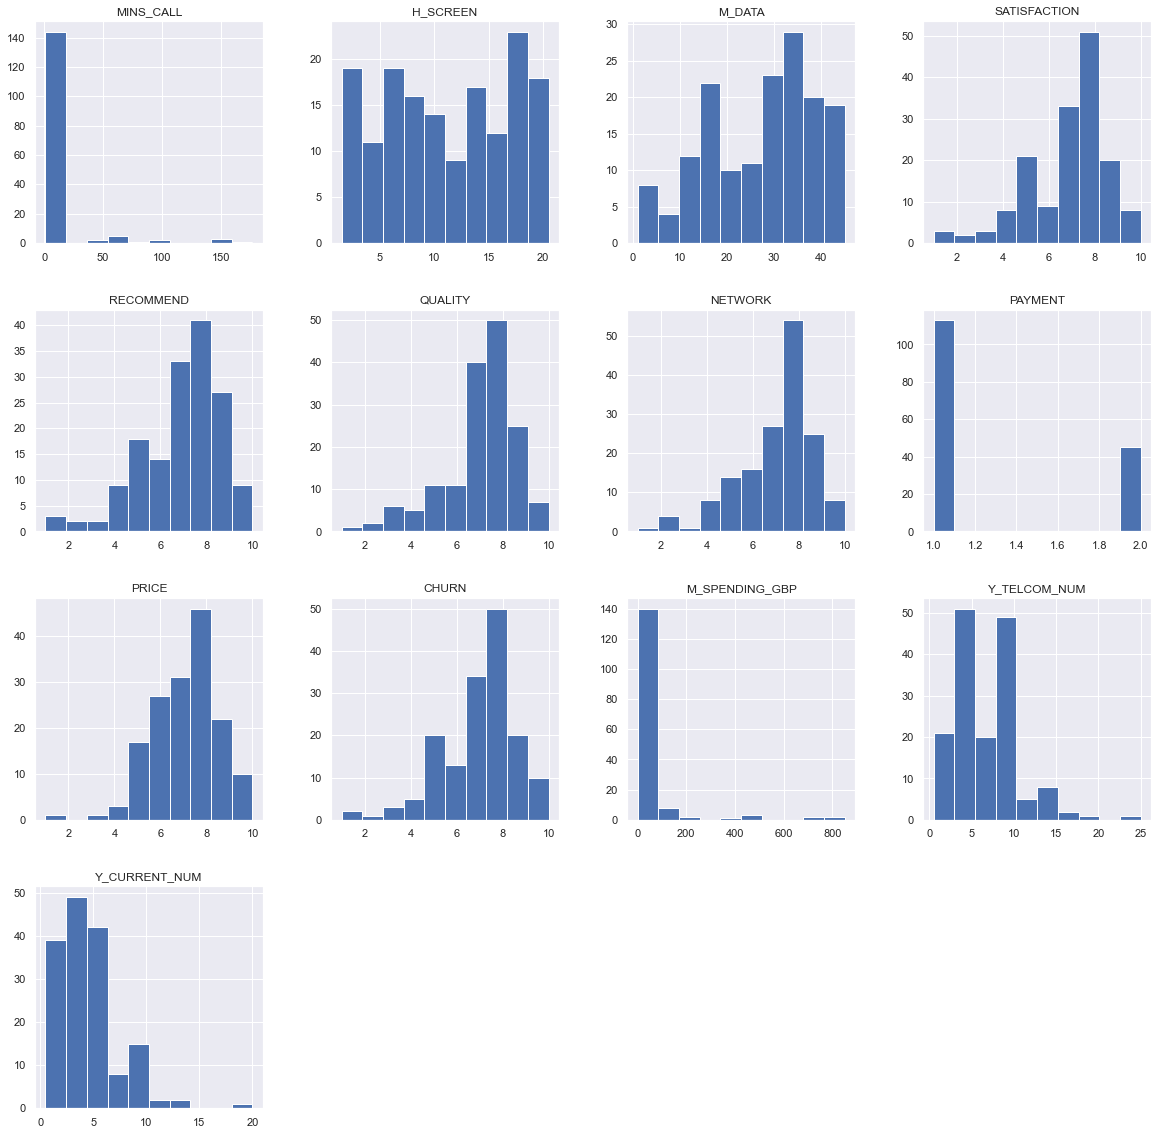

In [17]:
data_encoded.iloc[:, :15].hist(figsize = (20,20))

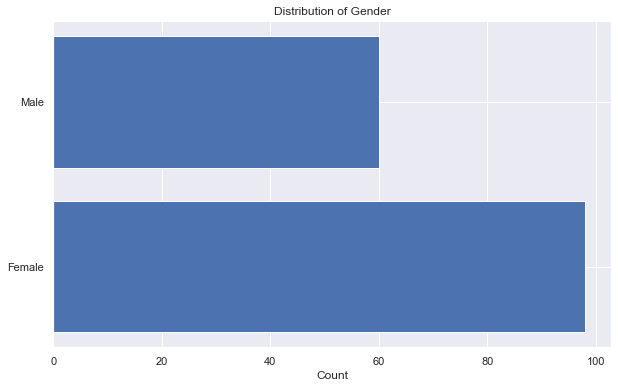

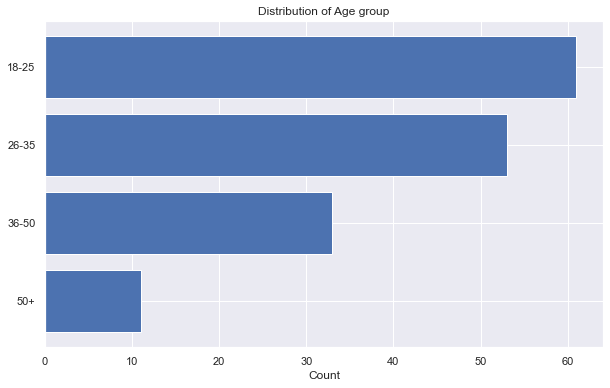

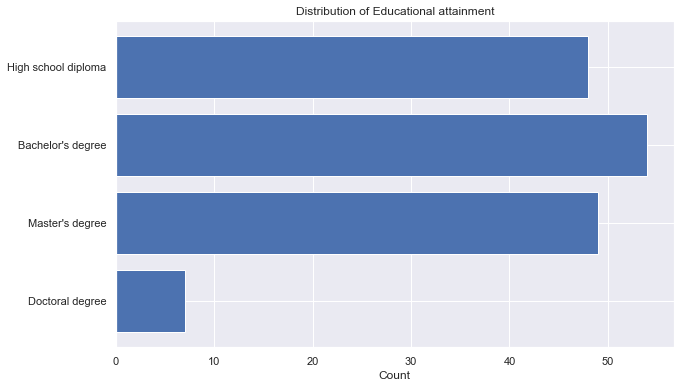

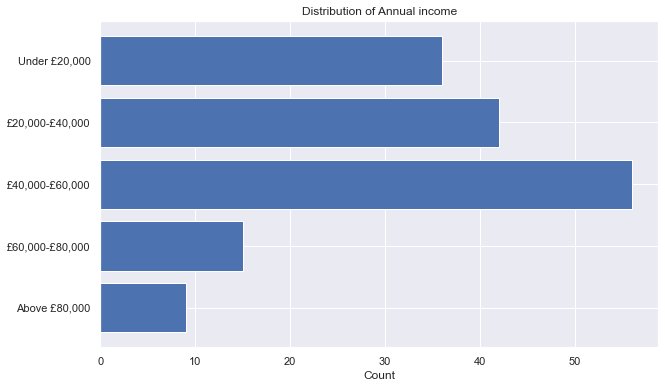

In [18]:
# Define the desired order of categories for each column
order_dict = {
    'Gender': ['Male', 'Female'],
    'Age group': ['18-25', '26-35', '36-50', '50+'],
    'Educational attainment': ['High school diploma', 'Bachelor\'s degree', 'Master\'s degree', 'Doctoral degree'],
    'Annual income': ['Under £20,000', '£20,000-£40,000', '£40,000-£60,000', '£60,000-£80,000', 'Above £80,000'],
}

for col in order_dict.keys():
    # Select only columns related to the original column (i.e., one-hot encoded)
    related_cols = [c for c in data_encoded.columns if col in c]
    
    # Calculate the sum of each one-hot encoded column
    sums = data_encoded[related_cols].sum()
    
    # Get the sums in the desired order
    ordered_sums = [sums[col + '_' + val] for val in order_dict[col]]
    
    # Plot the sums
    plt.figure(figsize=(10,6))
    plt.barh(list(reversed(order_dict[col])), list(reversed(ordered_sums)))
    plt.xlabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()



### 3.2. Data augmentation and EDA

### Bootstrapping and noise injection

In [19]:
# Bootstrapping
n_samples = len(data_encoded)
n_needed = 2000
n_to_bootstrap = n_needed - n_samples

# Bootstrap the needed samples
bootstrap_indices = np.random.choice(data_encoded.index, size=n_to_bootstrap)
bootstrap_samples = data_encoded.loc[bootstrap_indices].copy()

# Function to add noise while maintaining the constraints
def add_noise_and_clip(data, noise_level=0.01):
    numeric_cols = ['MINS_CALL', 'H_SCREEN', 'M_DATA', 'SATISFACTION', 'RECOMMEND',
       'QUALITY', 'NETWORK', 'PAYMENT', 'PRICE', 'M_SPENDING_GBP',
       'Y_TELCOM_NUM', 'Y_CURRENT_NUM']

    # Add noise to numeric columns
    for col in numeric_cols:
        noise = np.random.normal(0, noise_level, len(data))
        data[col] = data[col] + noise

        # Clip values to ensure they remain within valid range (e.g., 0 to 100)
        data[col] = np.clip(data[col], 0, 100)

    return data

# Apply noise injection to bootstrapped samples
bootstrap_samples = add_noise_and_clip(bootstrap_samples)

# Combine the original and bootstrapped samples
final_data = pd.concat([data_encoded, bootstrap_samples], ignore_index=True)

final_data

,RESPONSE,MINS_CALL,H_SCREEN,M_DATA,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,...,Age group_50+,Educational attainment_Bachelor's degree,Educational attainment_Doctoral degree,Educational attainment_High school diploma,Educational attainment_Master's degree,"Annual income_Above £80,000","Annual income_Under £20,000","Annual income_£20,000-£40,000","Annual income_£40,000-£60,000","Annual income_£60,000-£80,000"
0,R001,65.000000,9.500000,30.000000,2.000000,5.000000,7.000000,4.000000,1.000000,8.000000,...,0,0,0,0,1,0,0,0,1,0
1,R002,11.000000,10.000000,10.000000,5.000000,3.000000,3.000000,2.000000,2.000000,6.000000,...,0,0,0,0,1,0,0,0,1,0
2,R003,16.000000,1.500000,40.000000,7.000000,7.000000,7.000000,9.000000,1.000000,8.000000,...,0,0,0,0,1,0,0,0,1,0
3,R004,6.000000,5.500000,45.000000,5.000000,9.000000,4.000000,6.000000,1.000000,6.000000,...,0,0,1,0,0,0,0,0,1,0
4,R005,6.000000,7.000000,15.000000,4.000000,7.000000,5.000000,5.000000,1.000000,6.000000,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R097,10.991293,2.496339,44.989427,6.986486,7.016901,7.997238,7.995080,2.012091,7.993696,...,0,0,0,1,0,0,0,1,0,0
1996,R018,0.995777,7.980789,14.978427,7.981770,8.018397,8.019209,6.988594,2.003912,8.009268,...,0,0,0,1,0,0,0,0,1,0
1997,R045,16.013615,16.985178,2.993929,9.008968,9.002733,8.987778,8.991142,0.978514,8.991724,...,0,0,0,0,1,0,0,0,1,0
1998,R113,10.993708,20.494070,34.989704,6.007139,7.981130,7.988808,6.984064,1.991858,8.022354,...,0,0,0,0,1,0,0,1,0,0


### 3.3. Feature engineering

                MINS_CALL  H_SCREEN    M_DATA  SATISFACTION  RECOMMEND  \
MINS_CALL        1.000000  0.042013  0.110107     -0.063258   0.005132   
H_SCREEN         0.042013  1.000000  0.099428      0.095802   0.084397   
M_DATA           0.110107  0.099428  1.000000     -0.041205  -0.124907   
SATISFACTION    -0.063258  0.095802 -0.041205      1.000000   0.701071   
RECOMMEND        0.005132  0.084397 -0.124907      0.701071   1.000000   
QUALITY          0.072466  0.104196 -0.037080      0.738645   0.649700   
NETWORK          0.007369  0.030444 -0.022588      0.693239   0.674170   
PAYMENT          0.086637  0.121253  0.101272      0.038673   0.050914   
PRICE            0.071284  0.109968 -0.010934      0.492083   0.477116   
M_SPENDING_GBP   0.078010  0.018638 -0.018182     -0.012901   0.032400   
Y_TELCOM_NUM     0.013297 -0.069301  0.004418      0.051910   0.091037   
Y_CURRENT_NUM    0.104991  0.006059  0.045263      0.072677   0.028303   
CHURN            0.111044  0.129355 -0

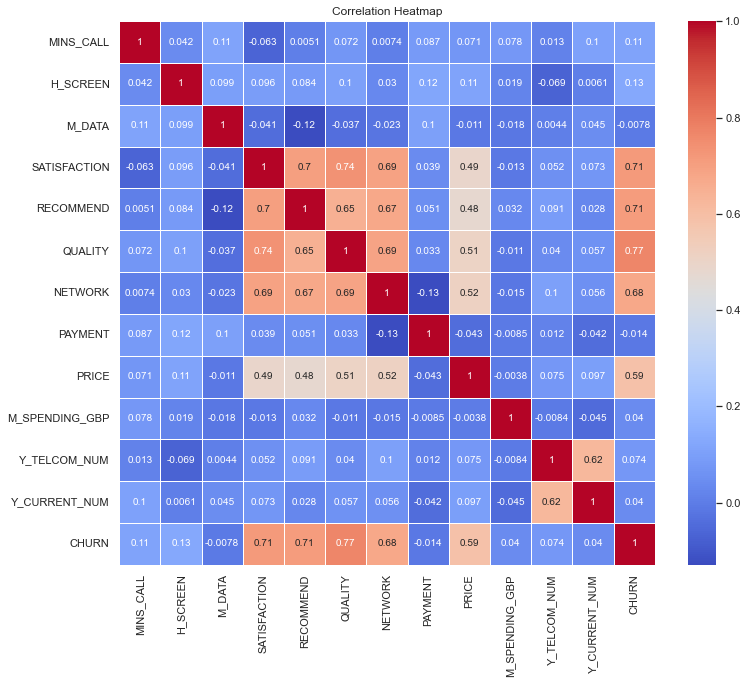

In [20]:
select_cols = ['MINS_CALL', 'H_SCREEN', 'M_DATA', 'SATISFACTION',
       'RECOMMEND', 'QUALITY', 'NETWORK', 'PAYMENT', 'PRICE', 'M_SPENDING_GBP',
       'Y_TELCOM_NUM', 'Y_CURRENT_NUM', 'CHURN']
# Calculate the correlation matrix
correlation_matrix = final_data[select_cols].corr()

# Print the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
input_variables = ['MINS_CALL', 'H_SCREEN', 'M_DATA', 'SATISFACTION',
       'RECOMMEND', 'QUALITY', 'NETWORK', 'PAYMENT', 'PRICE', 'M_SPENDING_GBP',
       'Y_TELCOM_NUM', 'Y_CURRENT_NUM']

In [22]:
from sklearn.preprocessing import StandardScaler
# Scale the original features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_data[input_variables])
scaled_df = pd.DataFrame(scaled_features, columns=input_variables)

# Replace the original columns with scaled ones in the main dataset
final_data[input_variables] = scaled_df

scaled_df.head()


,MINS_CALL,H_SCREEN,M_DATA,SATISFACTION,RECOMMEND,QUALITY,NETWORK,PAYMENT,PRICE,M_SPENDING_GBP,Y_TELCOM_NUM,Y_CURRENT_NUM
0,2.342856,-0.277136,0.205131,-2.657191,-1.085529,-0.122941,-1.750051,-0.627926,0.481188,-0.439976,0.000879,0.163178
1,-0.176202,-0.192430,-1.373139,-1.065162,-2.135638,-2.461146,-2.846625,1.593364,-0.812520,-0.504398,0.000879,0.163178
2,0.057044,-1.632429,0.994266,-0.003810,-0.035420,-0.122941,0.991385,-0.627926,0.481188,0.083454,-0.484124,-0.830184
3,-0.409448,-0.954782,1.388833,-1.065162,1.014688,-1.876594,-0.653477,-0.627926,-0.812520,-0.218525,1.940888,1.487662
4,-0.409448,-0.700665,-0.978571,-1.595838,-0.035420,-1.292043,-1.201764,-0.627926,-0.812520,9.545443,3.153394,-0.499063


## 4. Splitting the Dataset

In [23]:
from sklearn.model_selection import train_test_split
X = scaled_df
y = final_data['CHURN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Model Building & Evaluation

In [24]:
# Lists to store the metrics
training_accuracies = []
testing_accuracies = []
f1_scores_train = []
f1_scores_test = []

### 5.1. Multiple linear regression

Best hyperparameters: {'fit_intercept': True}
Linear Regression Training RMSE: 0.92
Linear Regression Testing RMSE: 0.87
Linear Regression Training R^2: 0.72
Linear Regression Testing R^2: 0.71


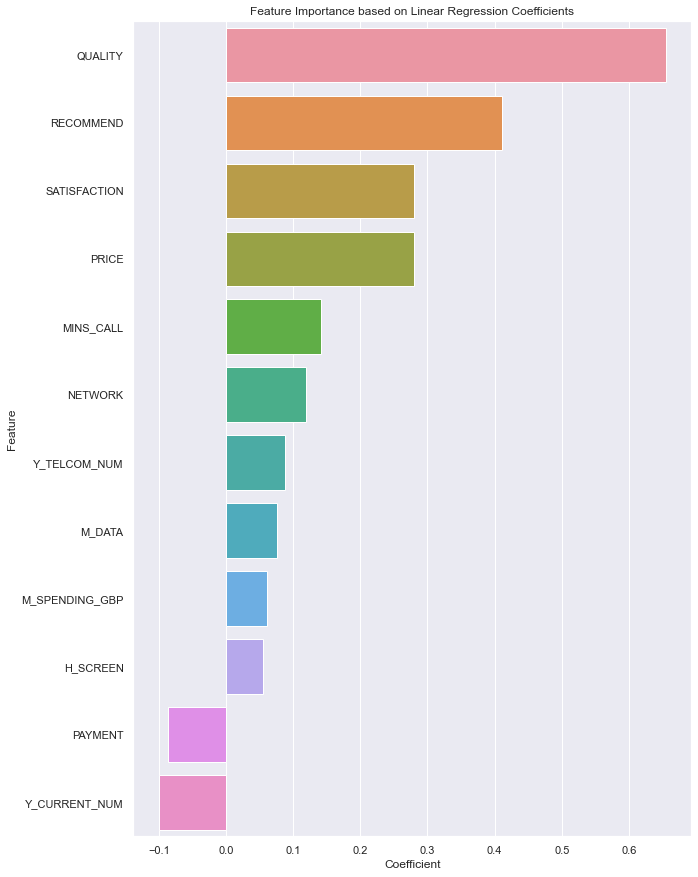

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Setting up a grid of hyperparameters to search over
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Creating a Linear Regression model
linear_reg = LinearRegression()

# Use GridSearchCV with k-fold cross-validation to find the best hyperparameters
linear_reg_cv = GridSearchCV(linear_reg, param_grid, cv=10)  # Using 10-fold CV
linear_reg_cv.fit(X_train, y_train)

# The best hyperparameters from the cross-validation
print(f"Best hyperparameters: {linear_reg_cv.best_params_}")

# Predictions with the best model
y_train_pred = linear_reg_cv.predict(X_train)
y_test_pred = linear_reg_cv.predict(X_test)

# Model Evaluation
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression Training RMSE: {train_rmse:.2f}")
print(f"Linear Regression Testing RMSE: {test_rmse:.2f}")
print(f"Linear Regression Training R^2: {train_r2:.2f}")
print(f"Linear Regression Testing R^2: {test_r2:.2f}")

# Storing metrics
# Lists to store the metrics
training_rmse = []
testing_rmse = []
training_r2 = []
testing_r2 = []
training_rmse.append(train_rmse)
testing_rmse.append(test_rmse)
training_r2.append(train_r2)
testing_r2.append(test_r2)

# Extracting Feature Importance (Coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": linear_reg_cv.best_estimator_.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 15))
sns.barplot(data=feature_importance, y="Feature", x="Coefficient")
plt.title("Feature Importance based on Linear Regression Coefficients")
plt.show()


### 5.2. Decision tree

C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wi

Cross-validation scores for each fold:
[0.725   0.675   0.71875 0.70625 0.7875  0.75625 0.7     0.725   0.79375
 0.675  ]
Mean CV Accuracy: 0.73
Standard Deviation of CV Accuracy: 0.04

Training Accuracy with Decision Tree: 0.75
Testing Accuracy with Decision Tree: 0.72

Training Data Metrics with Decision Tree:
[[  0   0   0   0   9   0   0  11   0   0]
 [  0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   1  14   0   0   8   0   0]
 [  0   0   0  68   0   0   0   1   0   0]
 [  0   0   0   7 172   0   6   9   2   0]
 [  0   5   0   0  20  70  31  10   3   0]
 [  0   0   0   8  32   2 216  61   0   0]
 [  0   0   0   0   0   0  52 473   0   0]
 [  0   0   0   7   8   0  16  45 137   0]
 [  0   0   0   8   0   0   0  26   0  57]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        20
         2.0       0.50      1.00      0.67         5
         3.0       0.00      0.00      0.00        23
         4.0       0.69      0.99     

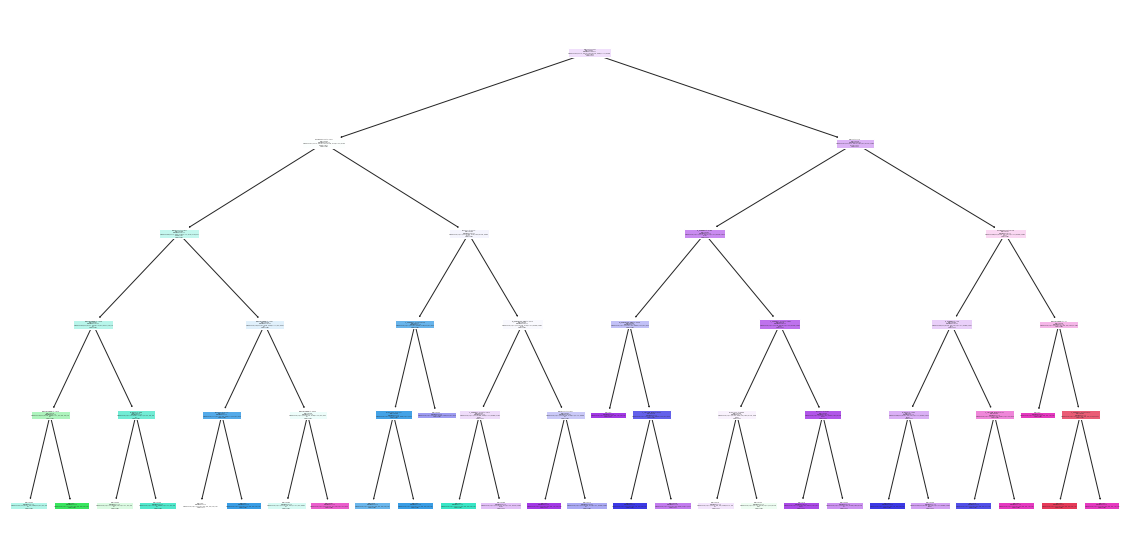

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score


# Initialize the Decision Tree Classifier with pruning strategies
clf_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

# Perform k-fold cross-validation
k = 10  # number of folds
cv_scores = cross_val_score(clf_tree, X_train, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores for each fold:\n{cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.2f}")

# Train the classifier on the full training data
clf_tree.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_tree = clf_tree.predict(X_train)
y_test_pred_tree = clf_tree.predict(X_test)

# Calculate accuracy for both training and testing sets
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f"\nTraining Accuracy with Decision Tree: {train_accuracy_tree:.2f}")
print(f"Testing Accuracy with Decision Tree: {test_accuracy_tree:.2f}")

# Metrics for training data
print("\nTraining Data Metrics with Decision Tree:")
print(confusion_matrix(y_train, y_train_pred_tree))
print(classification_report(y_train, y_train_pred_tree))

# Metrics for testing data
print("\nTesting Data Metrics with Decision Tree:")
print(confusion_matrix(y_test, y_test_pred_tree))
print(classification_report(y_test, y_test_pred_tree))

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
f1_train_tree = f1_score(y_train, y_train_pred_tree, average='weighted')
f1_test_tree = f1_score(y_test, y_test_pred_tree, average='weighted')

training_accuracies.append(train_accuracy_tree)
testing_accuracies.append(test_accuracy_tree)
f1_scores_train.append(f1_train_tree)
f1_scores_test.append(f1_test_tree)

# Visual representation of the decision tree to showcase its interpretability
plt.figure(figsize=(20,10))
plot_tree(clf_tree, filled=True, feature_names=X_train.columns, class_names=True, proportion=True)
plt.savefig('decision_tree_plot.png', dpi=300, bbox_inches='tight')  # Save the figure to a file
plt.show()



### 5.3. Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=42)

# Perform k-fold cross-validation
k = 10  # number of folds
cv_scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores for each fold:\n{cv_scores_rf}")
print(f"Mean CV Accuracy with Random Forest: {cv_scores_rf.mean():.2f}")
print(f"Standard Deviation of CV Accuracy with Random Forest: {cv_scores_rf.std():.2f}")

# Train the classifier on the full training data
clf_rf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_rf = clf_rf.predict(X_train)
y_test_pred_rf = clf_rf.predict(X_test)

# Calculate accuracy for both training and testing sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\nTraining Accuracy with Random Forest: {train_accuracy_rf:.2f}")
print(f"Testing Accuracy with Random Forest: {test_accuracy_rf:.2f}")

# Metrics for training data
print("\nTraining Data Metrics with Random Forest:")
print(confusion_matrix(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))

# Metrics for testing data
print("\nTesting Data Metrics with Random Forest:")
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
f1_test_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

training_accuracies.append(train_accuracy_rf)
testing_accuracies.append(test_accuracy_rf)
f1_scores_train.append(f1_train_rf)
f1_scores_test.append(f1_test_rf)



C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation scores for each fold:
[0.825   0.825   0.83125 0.9     0.84375 0.825   0.75    0.85625 0.89375
 0.83125]
Mean CV Accuracy with Random Forest: 0.84
Standard Deviation of CV Accuracy with Random Forest: 0.04

Training Accuracy with Random Forest: 0.85
Testing Accuracy with Random Forest: 0.85

Training Data Metrics with Random Forest:
[[ 20   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0]
 [  0   0  17   0   6   0   0   0   0   0]
 [  0   0   0  69   0   0   0   0   0   0]
 [  0   0   0   0 147   0  16  33   0   0]
 [  0   0   0   0   0 120  19   0   0   0]
 [  0   0   0   0   1   0 262  56   0   0]
 [  0   0   0   0   0   0   9 516   0   0]
 [  0   0   0   0   0   0   5  59 149   0]
 [  0   0   0   0   0   0   0  34   0  57]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       0.00      0.00      0.00         5
         3.0       1.00      0.74      0.85        23


C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\metrics\

### 5.4. Support vector machines (SVM)

In [29]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
clf_svm = SVC(kernel='linear', C=1, random_state=42)

# Perform k-fold cross-validation
k = 10  # number of folds
cv_scores_svm = cross_val_score(clf_svm, X_train, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores for each fold:\n{cv_scores_svm}")
print(f"Mean CV Accuracy with SVM: {cv_scores_svm.mean():.2f}")
print(f"Standard Deviation of CV Accuracy with SVM: {cv_scores_svm.std():.2f}")

# Train the classifier on the full training data
clf_svm.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_svm = clf_svm.predict(X_train)
y_test_pred_svm = clf_svm.predict(X_test)

# Calculate accuracy for both training and testing sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"\nTraining Accuracy with SVM: {train_accuracy_svm:.2f}")
print(f"Testing Accuracy with SVM: {test_accuracy_svm:.2f}")

# Metrics for training data
print("\nTraining Data Metrics with SVM:")
print(confusion_matrix(y_train, y_train_pred_svm))
print(classification_report(y_train, y_train_pred_svm))

# Metrics for testing data
print("\nTesting Data Metrics with SVM:")
print(confusion_matrix(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
f1_train_svm = f1_score(y_train, y_train_pred_svm, average='weighted')
f1_test_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

training_accuracies.append(train_accuracy_svm)
testing_accuracies.append(test_accuracy_svm)
f1_scores_train.append(f1_train_svm)
f1_scores_test.append(f1_test_svm)

C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation scores for each fold:
[0.70625 0.75    0.59375 0.68125 0.71875 0.70625 0.65    0.675   0.725
 0.69375]
Mean CV Accuracy with SVM: 0.69
Standard Deviation of CV Accuracy with SVM: 0.04

Training Accuracy with SVM: 0.70
Testing Accuracy with SVM: 0.69

Training Data Metrics with SVM:
[[ 20   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0]
 [  0   0  23   0   0   0   0   0   0   0]
 [  0   0   0  55  14   0   0   0   0   0]
 [  0   0   0   9 164  16   0   7   0   0]
 [  0   0   0   0  45  76  18   0   0   0]
 [  0   0   0   0  42  28 154  77  18   0]
 [  0   0   0   0  29   0  47 435  14   0]
 [  0   0   0   0   0  10  20  73 104   6]
 [  0   0   0   0   0   0   0   6   8  77]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        23
         4.0       0.86      0.80      0.83        6

### 5.5. k-nearest neighbors (k-NN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
# Setting k to a common default value of 5 as an example
k_neighbors = 5
clf_knn = KNeighborsClassifier(n_neighbors=k_neighbors)

# Perform k-fold cross-validation
k = 10  # number of folds
cv_scores_knn = cross_val_score(clf_knn, X_train, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores for each fold:\n{cv_scores_knn}")
print(f"Mean CV Accuracy with k-NN: {cv_scores_knn.mean():.2f}")
print(f"Standard Deviation of CV Accuracy with k-NN: {cv_scores_knn.std():.2f}")

# Train the classifier on the full training data
clf_knn.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred_knn = clf_knn.predict(X_train)
y_test_pred_knn = clf_knn.predict(X_test)

# Calculate accuracy for both training and testing sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"\nTraining Accuracy with k-NN: {train_accuracy_knn:.2f}")
print(f"Testing Accuracy with k-NN: {test_accuracy_knn:.2f}")

# Metrics for training data
print("\nTraining Data Metrics with k-NN:")
print(confusion_matrix(y_train, y_train_pred_knn))
print(classification_report(y_train, y_train_pred_knn))

# Metrics for testing data
print("\nTesting Data Metrics with k-NN:")
print(confusion_matrix(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
f1_train_knn = f1_score(y_train, y_train_pred_knn, average='weighted')
f1_test_knn = f1_score(y_test, y_test_pred_knn, average='weighted')

training_accuracies.append(train_accuracy_knn)
testing_accuracies.append(test_accuracy_knn)
f1_scores_train.append(f1_train_knn)
f1_scores_test.append(f1_test_knn)

Cross-validation scores for each fold:
[1.      1.      0.99375 1.      1.      1.      0.9875  0.98125 1.
 1.     ]
Mean CV Accuracy with k-NN: 1.00
Standard Deviation of CV Accuracy with k-NN: 0.01

Training Accuracy with k-NN: 1.00
Testing Accuracy with k-NN: 0.99

Training Data Metrics with k-NN:
[[ 20   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0]
 [  0   0  23   0   0   0   0   0   0   0]
 [  0   0   0  69   0   0   0   0   0   0]
 [  0   0   0   0 195   0   0   1   0   0]
 [  0   0   0   0   0 139   0   0   0   0]
 [  0   0   0   0   0   0 318   1   0   0]
 [  0   0   0   0   0   0   0 525   0   0]
 [  0   0   0   0   0   0   0   0 213   0]
 [  0   0   0   0   0   0   0   1   0  90]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        23
         4.0       1.00      1.00      1.00       

C:\Users\ngoc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


## 6. Analysis

           Feature  Permutation Importance
11       RECOMMEND                0.105000
10         QUALITY                0.102000
9            PRICE                0.085583
8          NETWORK                0.076583
7   M_SPENDING_GBP                0.037750
6     SATISFACTION                0.026167
5           M_DATA                0.023833
4         H_SCREEN                0.015750
3    Y_CURRENT_NUM                0.010083
2        MINS_CALL                0.009250
1     Y_TELCOM_NUM                0.002250
0          PAYMENT               -0.001333


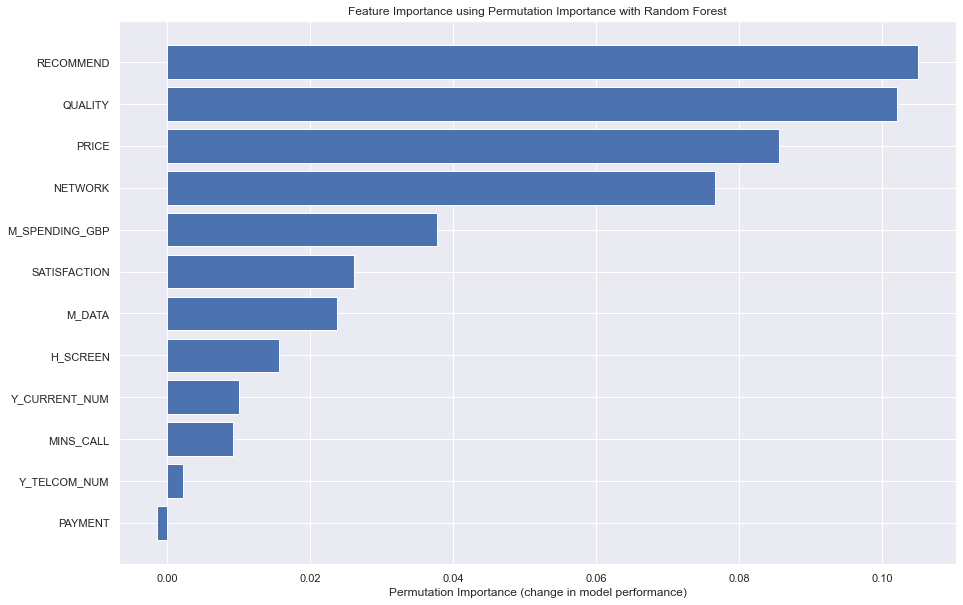

In [31]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(clf_rf, X_test, y_test, n_repeats=30, random_state=42)

# Sort indices for plotting
sorted_idx = result.importances_mean.argsort()

df_perm_importance = pd.DataFrame({
    'Feature': X_train.columns[sorted_idx],
    'Permutation Importance': result.importances_mean[sorted_idx]
})

# Sort the DataFrame in descending order of importance for better visibility
df_perm_importance = df_perm_importance.sort_values(by='Permutation Importance', ascending=False)

# Display the table
print(df_perm_importance)

# Plot
plt.figure(figsize=(15, 10))
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx].T)
plt.xlabel("Permutation Importance (change in model performance)")
plt.title("Feature Importance using Permutation Importance with Random Forest")
plt.show()
